In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import matplotlib.pyplot as plt


# Linear Regression: Predicting Salary based on Years of Experience
## 1. Import libraries and load dataset
## 2. Preprocessing
## 3. Train-Test Split
## 4. Model Training
## 5. Prediction & Evaluation
## 6. Visualization


In [2]:
df = pd.read_csv("Salary_Data[1].csv")

print(df.columns)
print(df.dtypes)
print(df.describe)
print(df.head)
print(df.isnull().sum())

Index(['YearsExperience', 'Salary'], dtype='object')
YearsExperience    float64
Salary             float64
dtype: object
<bound method NDFrame.describe of     YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27   

In [3]:
x=df['YearsExperience'].values.reshape(-1,1)

y=df['Salary']

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

r2 = r2_score(y_test, y_pred)  # variable name is fine
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

user_input=float(input("Enter the years of experience: "))
user_array=np.array([[user_input]])
user_array_scaled=scaler.transform(user_array)
prediction=model.predict(user_array_scaled)
print(f"Predicted salary: ${prediction[0]:,.2f}")


print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")



Enter the years of experience:  10


Predicted salary: $119,309.26
R²: 0.9414
MAE: 5161.33
RMSE: 6146.92


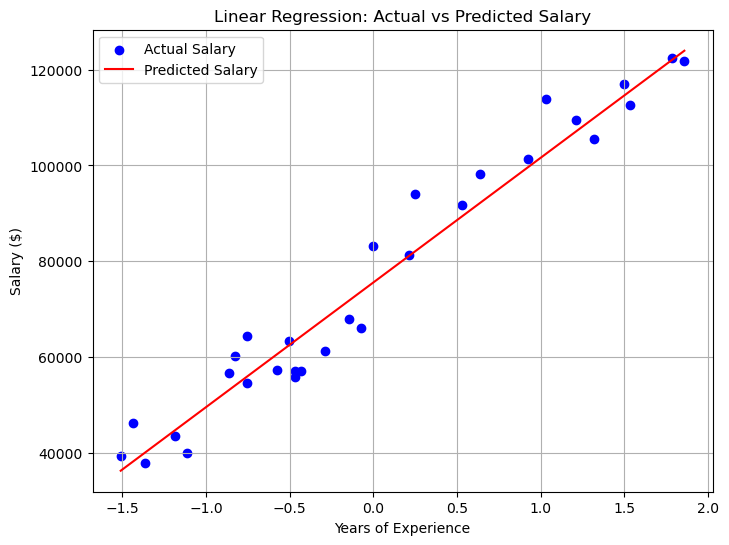

In [5]:
plt.figure(figsize=(8,6))
y_line=model.predict(x_scaled)
plt.scatter(x_scaled, y, color='blue', label="Actual Salary")
plt.plot(x_scaled, y_line, color='red', label="Predicted Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary ($)")
plt.title("Linear Regression: Actual vs Predicted Salary")
plt.legend()
plt.grid(True)
plt.show()
